In [34]:
## Import packages
import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import normalize 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn import datasets


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib import rcParams
rcParams['xtick.major.pad'] = 1
rcParams['ytick.major.pad'] = 1

In [36]:
# Load data from a csv file
bcdf = pd.read_csv('cancer.csv')
bcdf.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [37]:
# Numerize diagnosis "M" malignant; "B" benign using a dictionary and map function
diagnosis_coder = {'M':1, 'B':0}
bcdf.diagnosis = bcdf.diagnosis.map(diagnosis_coder)

In [38]:
#Drop unecessary columns
bcdf.drop(['id','Unnamed: 32'], axis = 1, inplace = True)

In [39]:
# Reorder columsn so diagnosis is right-most
# First define a diagnosis series object
diagnosis = bcdf.diagnosis

In [40]:
#Then drop diagnosis from dataframe
bcdf.drop('diagnosis', axis = 1, inplace = True)

In [41]:
# Then append diagnsis to end of dataframe
bcdf['Diagnosis'] = diagnosis

In [42]:
# Take a quick glimpse of the dataset
bcdf.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [43]:
# Quick glimpse of tumor features in relation to diagnosis
bcdf.groupby('Diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
Diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.158846,17.896152,78.160112,463.581742,0.092590,0.080187,0.046187,0.02579,0.174229,0.062879,...,13.390823,23.495815,87.084157,559.714888,0.125058,0.183005,0.166705,0.074653,0.270199,0.079468
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.08799,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [44]:
# For differential diagnosis visual comparisons.
# create to dataframes - one for positive, one for negative

bcdf_n = bcdf[bcdf['Diagnosis'] == 0]
bcdf_y = bcdf[bcdf['Diagnosis'] == 1]

# Create list of features related to mean tumor characteristics
features_means =list(bcdf.columns[0:10])

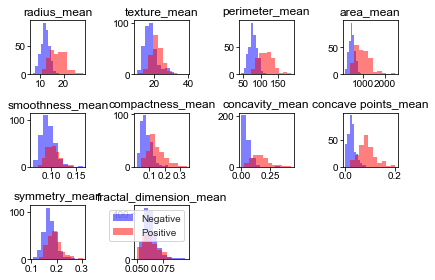

In [45]:
# Visualize tumor characteristics for positive and negatives diagnoses 


# Instantiate figure object
fig = plt.figure()
#plt.sup_title('Tumor Characteristic (means)')

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(bcdf.columns[0:10])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(bcdf_n[b], label = 'Negative', stacked = True, alpha=0.5, color= 'b')
    ax.hist(bcdf_y[b], label= 'Positive', stacked = True, alpha=0.5, color= 'r')
    ax.set_title(b)


sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

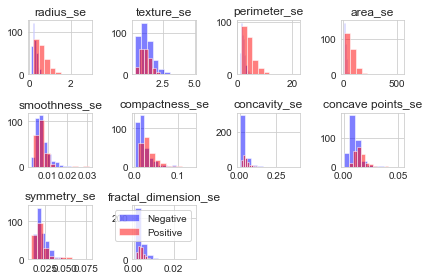

In [46]:
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(bcdf.columns[10:20])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(bcdf_n[b], label = 'Negative', stacked = True, alpha=0.5, color= 'b')
    ax.hist(bcdf_y[b], label= 'Positive', stacked = True, alpha=0.5, color= 'r')
    ax.set_title(b)


sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

In [47]:
bcdf.columns[20:]


Index(['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'Diagnosis'],
      dtype='object')

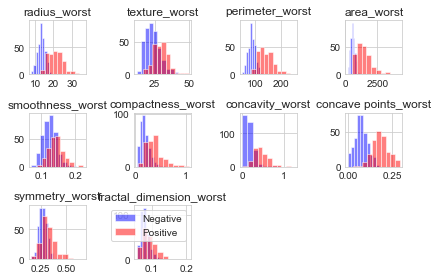

In [48]:
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(bcdf.columns[20:-1])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(bcdf_n[b], label = 'Negative', stacked = True, alpha=0.5, color= 'b')
    ax.hist(bcdf_y[b], label= 'Positive', stacked = True, alpha=0.5, color= 'r')
    ax.set_title(b)


sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

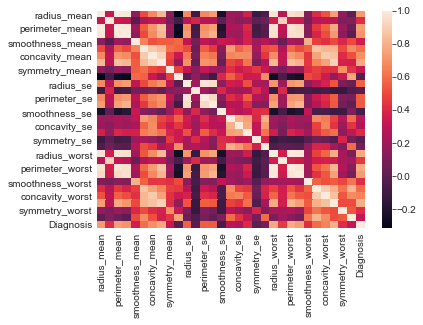

In [49]:
# Quick visualization of relationships between features and diagnoses

sns.heatmap(bcdf.corr())
sns.set_style("whitegrid")
plt.show()

In [50]:
# Split data into testing and training set. Use 80% for training
X_train, X_test, y_train, y_test = train_test_split(bcdf.iloc[:,:-1], bcdf['Diagnosis'], train_size = .8 )

In [51]:
#The normalize features to account for feature scaling

# Instantiate 
norm = Normalizer()

# Fit
norm.fit(X_train)

# Transform both training and testing sets
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [52]:
# Define parameters for optimization using dictionaries {parameter name: parameter list}

SVM_params = {'C':[0.001, 0.1, 10, 100], 'kernel':['rbf' ,'linear', 'poly', 'sigmoid']}
LR_params = {'C':[0.001, 0.1, 1, 10, 100]}
LDA_params = {'n_components':[None, 1,2,3], 'solver':['svd'], 'shrinkage':[None]}
KNN_params = {'n_neighbors':[1,5,10,20], 'p':[2], 'metric':['minkowski']}
RF_params = {'n_estimators':[10,50,100]}
DTC_params = {'criterion':['entropy'], 'max_depth':[10, 50, 100]}
NB_mult_params = {'alpha':[1,10]}

In [53]:
# Append list of models with parameter dictionaries

models_opt = []

models_opt.append(('LR', LogisticRegression(), LR_params))
models_opt.append(('LDA', LinearDiscriminantAnalysis(), LDA_params))
models_opt.append(('KNN', KNeighborsClassifier(),KNN_params))
models_opt.append(('DTC', DecisionTreeClassifier(), DTC_params))
models_opt.append(('RFC', RandomForestClassifier(), RF_params))
models_opt.append(('SVM', SVC(), SVM_params))
models_opt.append(('NB', MultinomialNB(), NB_mult_params))

In [55]:
# Create global list to collect model CV scores and list of model names (for visualization)
results = []
names = []

# Set the scoring parameter of CV_score to measure model accuracy
scoring = 'accuracy'


# Define a 'for loop' to cycle through list of models and parameter dictionaries
for name, model, params in models_opt:
    
# Use kfolds to break the training data into 5 folds for cross validation
    kfold = KFold(len(X_train_norm), n_splits=5, random_state=2, shuffle=True)
    
# Instantiate gridsearch using the model and parameters (pull from above list of dictionaries)
    model_grid = GridSearchCV(model, params)
    
# Use cross validation method with gridsearch instantiated model, normalized training and 
# testing data, kolds and the scoring parameters
    cv_results = cross_val_score(model_grid, X_train_norm, y_train, cv = kfold, scoring=scoring)

# Append results list with model cv data that includes accuracy scores for 5-fold cross validation 
    results.append(cv_results)

# Append names list - this will help organize model cv performance data with the actaully model name 
    names.append(name)

# Define a string object to list model name, cv accuracy, and cv standard deviation.
    msg = "Cross Validation Accuracy %s: Accarcy: %f SD: %f" % (name, cv_results.mean(), cv_results.std())

# Print message object after completion of 'for loop.'
print(msg)

TypeError: __init__() got multiple values for argument 'n_splits'